In [ ]:
"""
Run in terminal shell:
# Install cblas and python-dev header (Linux only).
# - cblas can be installed with libatlas-base-dev or libopenblas-dev (Ubuntu)
$ sudo apt-get install python-dev libopenblas-dev

# Clone the repo including submodules (or clone + `git submodule update --init --recursive`)
$ git clone --recursive https://github.com/ibayer/fastFM.git

# Enter the root directory
$ cd fastFM

# Install Python dependencies (Cython>=0.22, numpy, pandas, scipy, scikit-learn)
$ pip install -r ./requirements.txt

# Compile the C extension.
$ make                      # build with default python version (python)
$ PYTHON=python3 make       # build with custom python version (python3)

# Install fastFM
$ pip install .
"""

In [ ]:
def FM():
    from fastFM import mcmc
    from sklearn.feature_extraction import DictVectorizer
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split

    dataset = matrix_modules.load_in_tensorflow_full()
    v = DictVectorizer()

    x = v.fit_transform(list(dataset[["user_id", "news_id"]].T.to_dict().values()))
    y = np.asarray(dataset["score"])

    n_iter = 300
    seed = 123
    step_size = 1

    fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
    # Allocates and initalizes the model and hyper parameter.
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

    # Allocates and initalizes the model and hyper parameter.
    fm.fit_predict(X_train, y_train, X_test)

    rmse_test = []
    hyper_param = np.zeros((n_iter -1, 3 + 2 * rank), dtype=np.float64)

    for nr, i in tqdm(enumerate(range(1, n_iter))):
    fm.random_state = i * seed
    y_pred = fm.fit_predict(X_train, y_train, X_test, n_more_iter=step_size)
    rmse_test.append(np.sqrt(mean_squared_error(y_pred, y_test)))
    hyper_param[nr, :] = fm.hyper_param_

    values = np.arange(1, n_iter)
    x_new = values * step_size
    burn_in = 5
    x_new = x_new[burn_in:]

from matplotlib import pyplot as plt

def plot_iter(x, rmse_test, hyper_param, burn_in):
  fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 8))

  axes[0, 0].plot(x, rmse_test[burn_in:], label='test rmse', color="r")
  axes[0, 0].legend()
  axes[0, 1].plot(x, hyper_param[burn_in:,0], label='alpha', color="b")
  axes[0, 1].legend()
  axes[1, 0].plot(x, hyper_param[burn_in:,1], label='lambda_w', color="g")
  axes[1, 0].legend()
  axes[1, 1].plot(x, hyper_param[burn_in:,3], label='mu_w', color="g")
  axes[1, 1].legend()

plot_iter(x_new, rmse_test, hyper_param, burn_in)


In [1]:
from fastFM import bpr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matrix_modules
from tqdm import tqdm
from sklearn.feature_extraction import DictVectorizer


In [2]:
dataset = matrix_modules.load_in_tensorflow_full()

In [4]:
dataset.head(1)

,user_id,time,news_id,category,sub_category,title,abstract,interaction_type,score
0,U66319,1,N10721,entertainment,entertainment-celebrity,Mike Johnson asks out Keke Palmer after Demi L...,Mike Johnson tried to ask out Keke Palmer in a...,history,1


In [3]:
v = DictVectorizer()

To change the features being added the sparse matrix just add them to the list and it should work. You can even test them iteratively if you want with different combonations of features using this as the baseline code: 
```
candidate_columns = [
  ["user_id", "product_id", "score"],
  ["user_id", "product_id", "score", "helpfulness_agreed"],
  ["user_id", "product_id", "score", "helpfulness_agreed", "helpfulness_reviewed"],
  ["user_id", "product_id", "score", "sales_rank", "group"],
  ["user_id", "product_id", "score", "review_year"],
]

rmse_test = []

rank = 4

for column in candidate_columns:
  print(column)
  filtered_lens = pd_ratings[column].dropna()
  v = DictVectorizer()
  X_more_feature = v.fit_transform(list(filtered_lens.drop('score', axis=1).T.to_dict().values()))
  y_more_feature = filtered_lens['score'].tolist()

  X_mf_train, X_mf_test, y_mf_train, y_mf_test = train_test_split(X_more_feature, y_more_feature, test_size=0.4, random_state=42)

  scaler = StandardScaler()
  y_mf_train_norm = scaler.fit_transform(np.array(y_mf_train).reshape(-1, 1)).ravel()

  fm = mcmc.FMRegression(n_iter=n_iter, rank=rank, random_state=seed)
  # Allocates and initalizes the model and hyper parameter.
  fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)

  y_pred = fm.fit_predict(X_mf_train, y_mf_train_norm, X_mf_test)
  rmse_test.append(np.sqrt(mean_squared_error(scaler.inverse_transform(y_pred.reshape(-1, 1)), y_mf_test)))

```

In [25]:
x = v.fit_transform(list(dataset[["user_id", "news_id"]].T.to_dict().values()))
y = dataset["score"].to_list()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

from sklearn.preprocessing import StandardScaler
import numpy as np


In [17]:
## Plot with iter
# How many times should we iterate?

n_iter = 25
seed = 123
step_size = 1
rank = 4

from fastFM import mcmc
from sklearn.metrics import mean_squared_error

y_train = np.array(y_train)
fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
# Allocates and initalizes the model and hyper parameter.
fm.fit_predict(X_train, y_train, X_test)

rmse_test = []
hyper_param = np.zeros((n_iter -1, 3 + 2 * rank), dtype=np.float64)

In [18]:
for nr, i in tqdm(enumerate(range(1, n_iter))):
  fm.random_state = i * seed
  y_pred = fm.fit_predict(X_train, y_train, X_test, n_more_iter=step_size)
  rmse_test.append(np.sqrt(mean_squared_error(y_pred, y_test)))
  hyper_param[nr, :] = fm.hyper_param_

0it [00:00, ?it/s]

0 1


10it [03:17, 19.55s/it]

10 11


20it [06:37, 20.02s/it]

20 21


24it [07:57, 19.90s/it]


In [ ]:
y

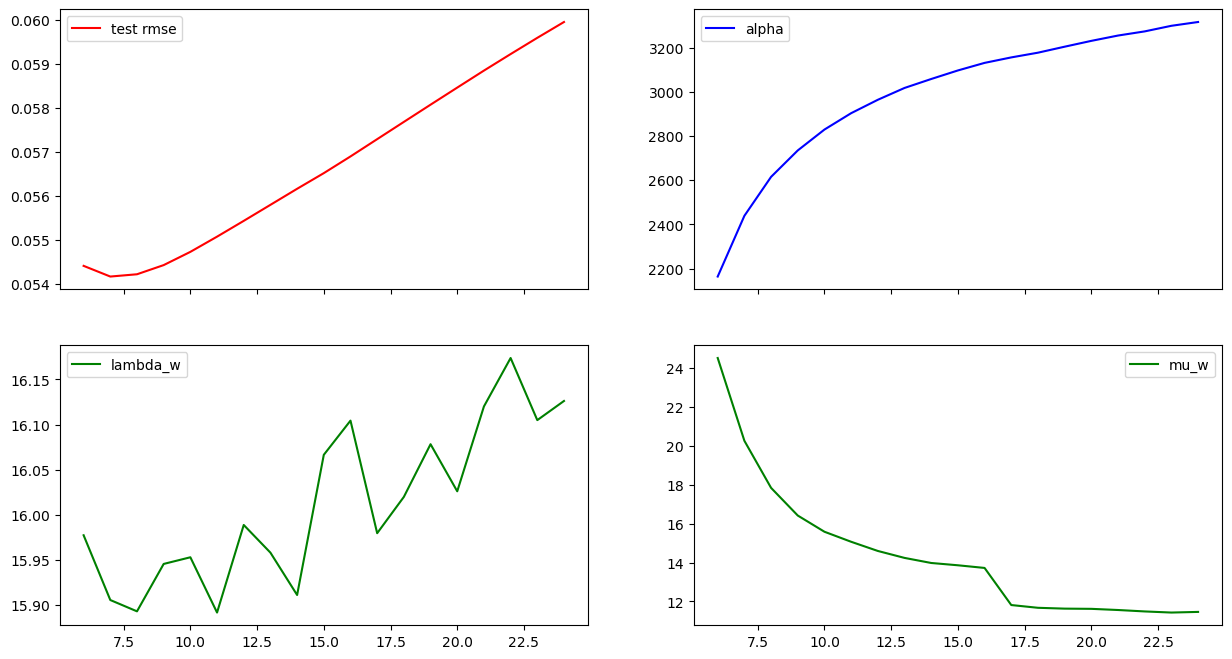

In [20]:
values = np.arange(1, n_iter)
x_new = values * step_size
burn_in = 5
x_new = x_new[burn_in:]

from matplotlib import pyplot as plt

def plot_iter(x, rmse_test, hyper_param, burn_in):
  fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 8))

  axes[0, 0].plot(x, rmse_test[burn_in:], label='test rmse', color="r")
  axes[0, 0].legend()
  axes[0, 1].plot(x, hyper_param[burn_in:,0], label='alpha', color="b")
  axes[0, 1].legend()
  axes[1, 0].plot(x, hyper_param[burn_in:,1], label='lambda_w', color="g")
  axes[1, 0].legend()
  axes[1, 1].plot(x, hyper_param[burn_in:,3], label='mu_w', color="g")
  axes[1, 1].legend()

plot_iter(x_new, rmse_test, hyper_param, burn_in)

In [21]:
# Minimum RMSE
print(np.argmin(rmse_test), np.min(rmse_test))

6 0.0541730542668336


In [22]:
## Plot with Rank
# Rank is the key hyper parameter for tuning
rmse_test = []
n_iter = 100
ranks = [4, 8, 16]

for rank in ranks:
  print(rank)
  fm = mcmc.FMRegression(n_iter=n_iter, rank=rank, random_state=seed)
  # Allocates and initalizes the model and hyper parameter.
  fm.fit_predict(X_train, y_train, X_test)

  y_pred = fm.fit_predict(X_train, y_train, X_test)
  rmse = np.sqrt(mean_squared_error(y_pred, y_test))
  rmse_test.append(rmse)
  print('rank:{}\trmse:{:.3f}'.format(rank, rmse))

    
def plot_ranks(ranks, rmse_test):
  plt.plot(ranks, rmse_test, label='test rmse', color="r")
  plt.legend()


plot_ranks(ranks, rmse_test)  
print("min rmse: {:.3f}".format(np.min(rmse_test)))

4


KeyboardInterrupt: 

In [ ]:
def FM():
    from fastFM import mcmc
    from sklearn.feature_extraction import DictVectorizer
    from sklearn.metrics import mean_squared_error

    dataset = matrix_modules.load_in_tensorflow_full()
    v = DictVectorizer()

    x = v.fit_transform(list(dataset[["user_id", "news_id"]].T.to_dict().values()))
    y = np.asarray(dataset["score"])

    n_iter = 25
    seed = 123
    step_size = 1
    rank = 4

    fm = mcmc.FMRegression(n_iter=0, rank=rank, random_state=seed)
    # Allocates and initalizes the model and hyper parameter.
    fm.fit(x, y)
